In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Bio.PDB import PDBIO
from Bio.PDB.PDBParser import PDBParser
import sys
import warnings
from Bio.Data import IUPACData
warnings.filterwarnings('ignore')

In [2]:
from Integrators import Beeman, Brownian, Langevin, LeapFrog, Rubens, Velocity_Verlet, Verlet

In [33]:
# Función para obtener una matriz con las posiciones, nombres y masas atómicas de cualquier pdb
def get_positions(x,y):
    s = PDBParser().get_structure(x,y)
    name = np.array([(atom.get_name())[0] for chains in s for chain in chains for residue in chain for atom in residue])
    positions = np.array([atom.get_coord() for chains in s for chain in chains for residue in chain for atom in residue])
    mass=np.array([IUPACData.atom_weights[name[i].capitalize()] for i in range(len(name))])
    return name, positions, mass

def sign(x):
    if x < 0:
        return '-'
    else:
        return ' '

#Funcion para grabar PDB
def write_pdb(x,y,z,name,tiempo,filename):
    n = len(name)
    l1 = []
    j = 0
    for i in range(len(tiempo)):
        l1.append('MODEL        %d' %(j+1))
        for k in range(n):
            if k<9:
                l1.append('ATOM      %d  %s   %s       1     %s%0.3f  %s%0.3f  %s%0.3f  1.00  0.00' \
            %(k+1, name[k], name[k], sign(x[i,k]), np.abs(x[i,k]), sign(y[i,k]), np.abs(y[i,k]), sign(z[i,k]), np.abs(z[i,k])))
            else:
                l1.append('ATOM     %d  %s   %s       1     %s%0.3f  %s%0.3f  %s%0.3f  1.00  0.00' \
            %(k+1, name[k], name[k], sign(x[i,k]), np.abs(x[i,k]), sign(y[i,k]), np.abs(y[i,k]), sign(z[i,k]), np.abs(z[i,k])))
        j = j + 1
        l1.append('ENDMDL')
    pdb = np.column_stack(l1)
    np.savetxt(filename, pdb, delimiter = "\n", fmt = "%s")

def solve_system(integrador, molecula,moleculapdb,dt,tmax,filename):
    name, positions, mass = get_positions(molecula, moleculapdb)
    # Número de partículas
    n=len(name)
    
    #Numero de avogadro
    avogadro=6.023e23
    #Ajuste a la masa para ponerla en kg
    mass=mass*(1e-3/avogadro)
    
    #Ajuste a las posiciones para ponerlas en metros
    positions=positions*1e-10
    
    # Arreglo de tiempo
    t0 = np.arange(0, tmax, dt)
    # Posiciones iniciales
    posx=np.zeros((len(t0),n))
    posx[0,:]=positions[:,0]
    posy=np.zeros((len(t0),n))
    posy[0,:]=positions[:,1]
    posz=np.zeros((len(t0),n))
    posz[0,:]=positions[:,2]

    # Velocidad inicial=0
    velx = np.zeros((len(t0),n))
    vely = np.zeros((len(t0),n))
    velz = np.zeros((len(t0),n))
        
    posx, velx = integrador(posx, velx, dt, t0, n, mass)
    posy, vely = integrador(posy, vely, dt, t0, n, mass)
    posz, velz = integrador(posz, velz, dt, t0, n, mass)
    
    #Graficar resultados de las posiciones
    fig=plt.figure(figsize=(10,10))
    plt.subplot(3,3,1)
    plt.title('x vs t')
    plt.plot(t0,posx[:,:])
    plt.subplot(3,3,2)
    plt.title('y vs t')
    plt.plot(t0,posy[:,:])
    plt.subplot(3,3,3)
    plt.title('z vs t')
    plt.plot(t0,posz[:,:])
    plt.subplot(3,3,4)
    plt.title('vx vs t')
    plt.plot(t0,velx[:,:])
    plt.subplot(3,3,5)
    plt.title('vy vs t')
    plt.plot(t0,vely[:,:])
    plt.subplot(3,3,6)
    plt.title('vz vs t')
    plt.plot(t0,velz[:,:])
    plt.subplot(3,3,7)
    plt.title('x vs y')
    plt.plot(posx[:,:],posy[:,:])
    plt.subplot(3,3,8)
    plt.title('y vs z')
    plt.plot(posy[:,:],posz[:,:])
    plt.subplot(3,3,9)
    plt.title('x vs z')
    plt.plot(posx[:,:],posz[:,:])
    plt.show()
    write_pdb(posx, posy, posz, name, t0, filename)
    return

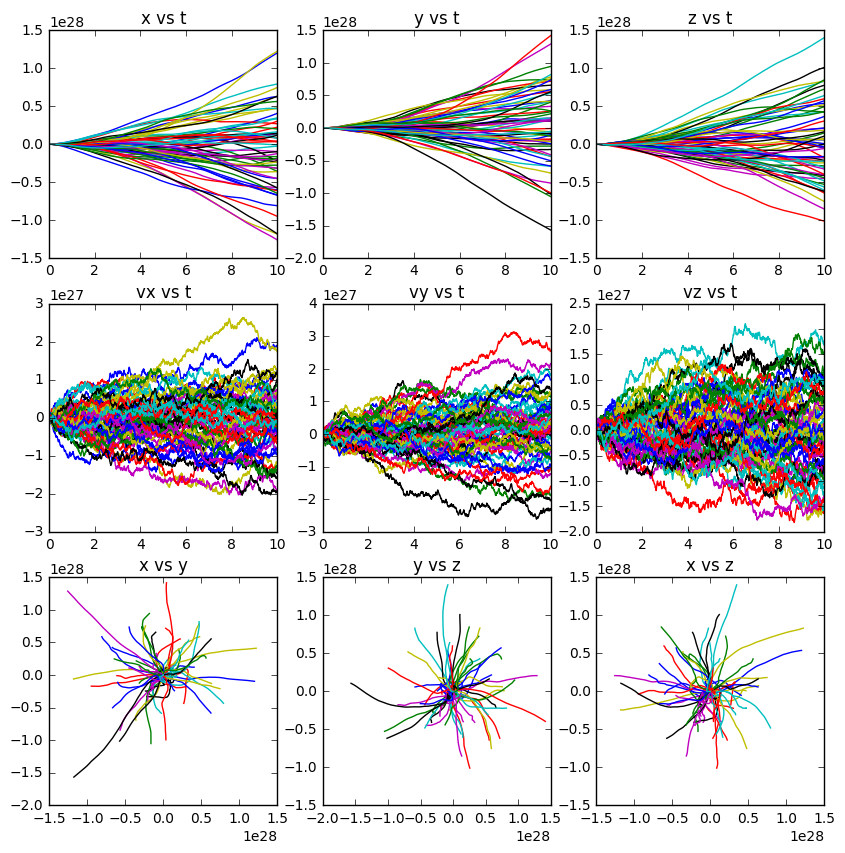

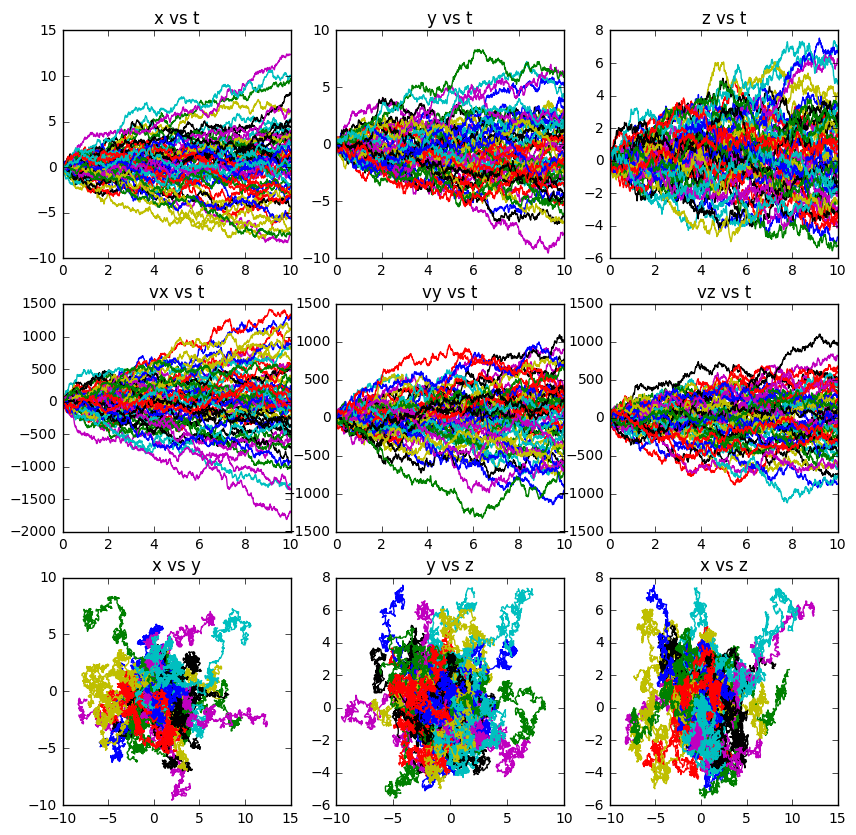

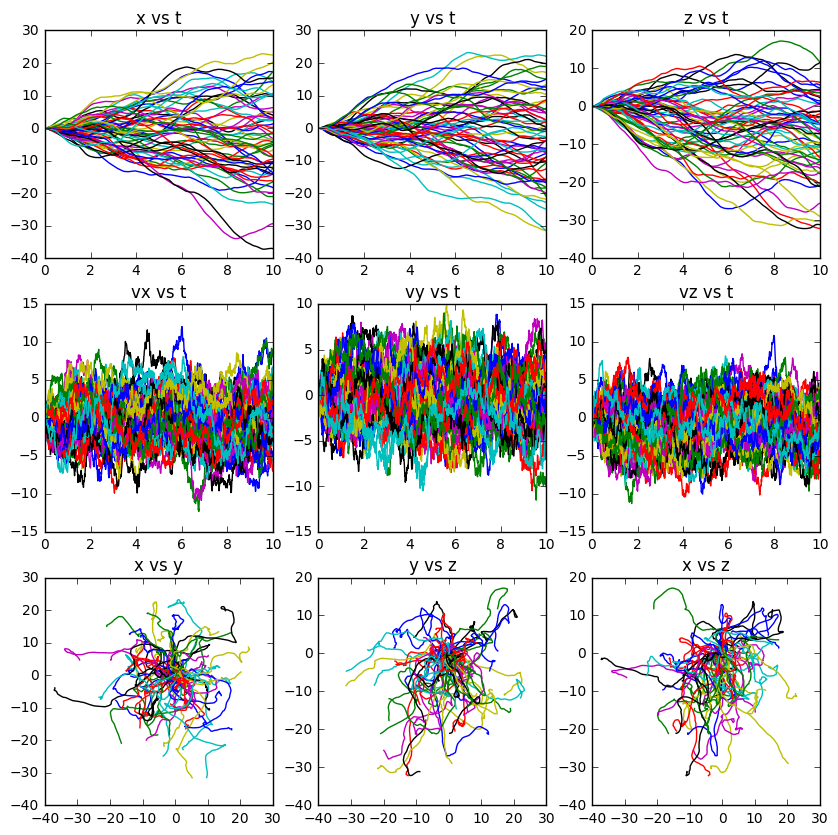

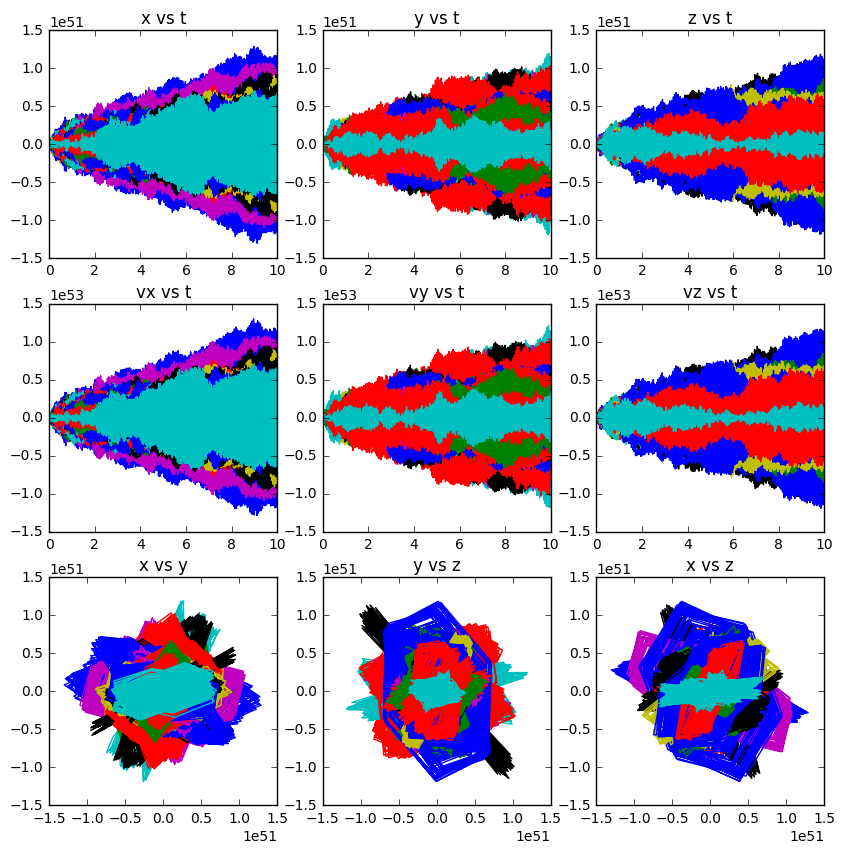

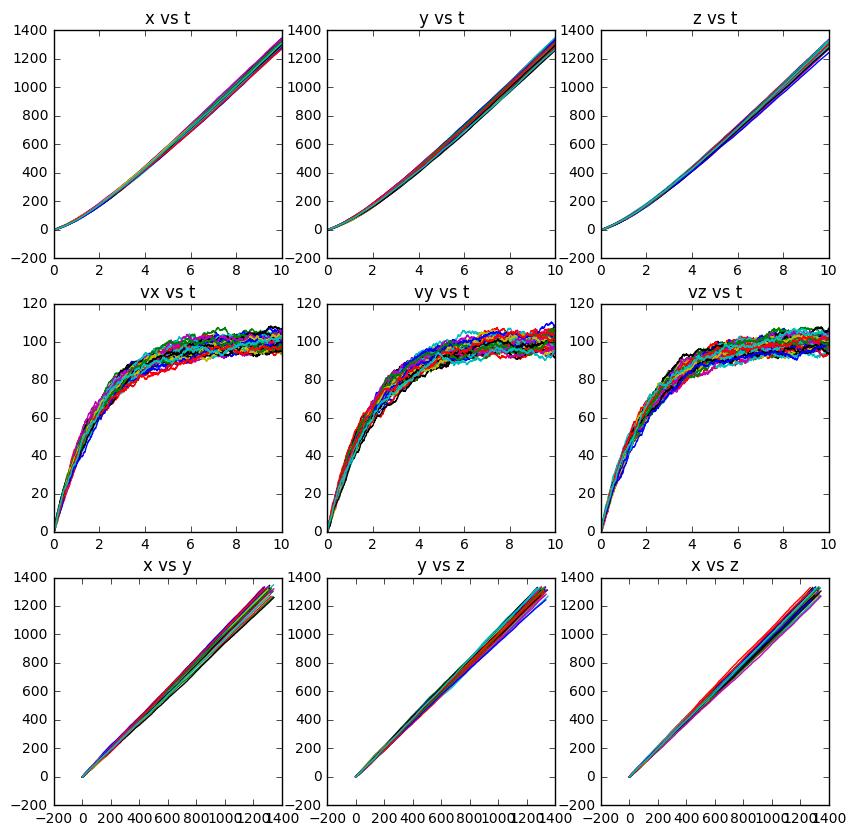

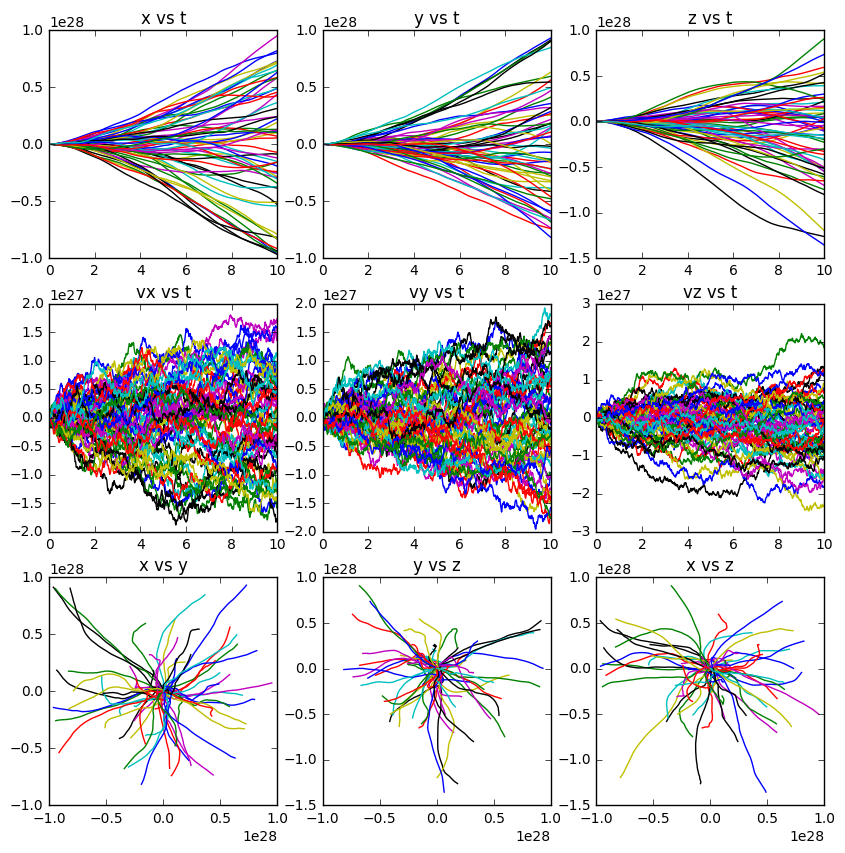

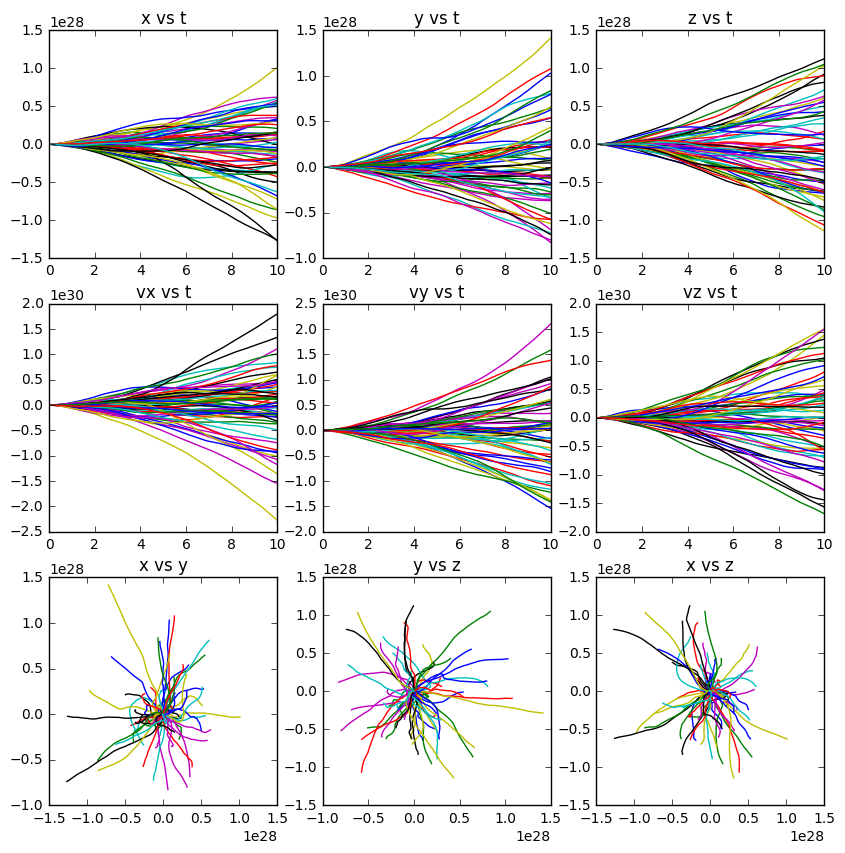

In [34]:
integrators = [Beeman, Brownian, Langevin, LeapFrog, Rubens, Velocity_Verlet, Verlet]
for integrator in integrators:
    solve_system(integrator, "c60", "c60.pdb", 0.01, 10, 'c60_sol_'+str(integrator)[10:-23]+'.pdb')

In [18]:
#Este código ayuda a verificar si los pdb están bien escritos
PDB_input = sys.argv[1]
parser = PDBParser()
structure = parser.get_structure("c60", "c60.pdb")
# DELETED CODE THAN MANIPULATED PDB OBJECT 
w = PDBIO()
w.set_structure(structure)
w.save('Prueba.pdb')

In [4]:
#Ejemplos de como trabaja la función para obtener masas atómicas
print(IUPACData.atom_weights["ca".capitalize()]) #Masa atómica calcio
print(IUPACData.atom_weights["c".capitalize()]) #Masa atómica carbono

40.078
12.0107
